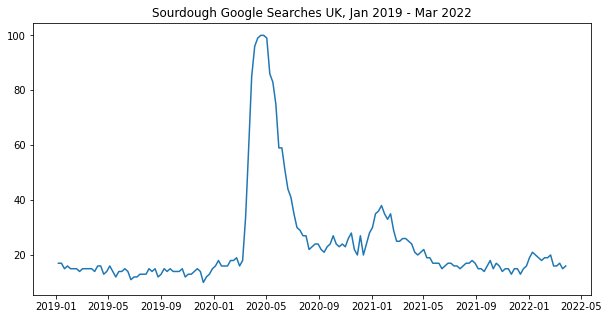

In [9]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

#setup Google trend query
pytrends = TrendReq(hl='en-UK', tz=0)
kw_list =["sourdough"]
pytrends.build_payload(kw_list, geo='GB', timeframe='2019-01-01 2022-03-31') 

#get data over time
data = pytrends.interest_over_time() 

#plot data
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(data.index, data["sourdough"])
plt.title("Sourdough Google Searches UK, Jan 2019 - Mar 2022")
plt.show()

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import font_manager
import numpy as np
from datetime import timedelta
  

In [13]:
#setup Google trend query
pytrends = TrendReq(hl='en-UK', tz=0)
kw_list =["sourdough"]
pytrends.build_payload(kw_list, geo='GB', timeframe='2019-01-01 2022-03-31') 

#get data over time
df = pytrends.interest_over_time() 

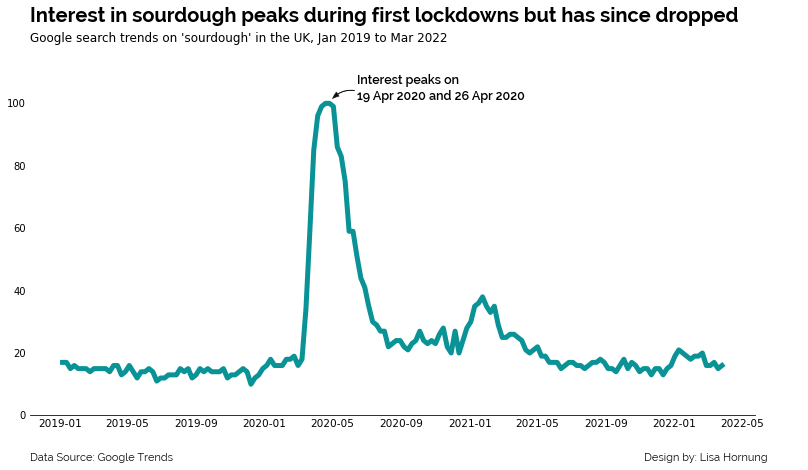

In [124]:
#define general colours, font styles and dot position
offwhite = "#f9f9f9"
light = "#d9d9d9"
dark = "#c8b3b2"

main_title = "Interest in sourdough peaks during first lockdowns but has since dropped"
description = "Google search trends on 'sourdough' in the UK, Jan 2019 to Mar 2022"

colors = {"line": "#0a9396"}

label_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-Regular.ttf')
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-Bold.ttf')
annot_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\Raleway-SemiBold.ttf')

# =========
# Initialise Figure and define layout
fig, ax = plt.subplots(figsize=(13,6))
fig.set_facecolor('white')


## plot data
plt.plot(df.index, df["sourdough"], zorder=2, linewidth=5, color=colors["line"])

#remove grid
for pos in ['right', 'top',  'left']:
    plt.gca().spines[pos].set_visible(False)

plt.gca().patch.set_alpha(0)     

#========
#yaxis
plt.tick_params(axis='both', length = 0, color = "#444444")
plt.tick_params(axis='y', labelsize=10)
plt.gca().set_ylim(ymin=0)
#plt.grid(visible=True, axis='y', zorder=1, color = "#D3D3D3")


plt.tick_params(axis='x', labelsize=10.5)

### ARROWS
#define style
style = "Simple, tail_width=0.5, head_width=5, head_length=7"
kw = dict(arrowstyle=style, color="#111111")

#define arrows
x_peak = list(df[df["sourdough"] == df["sourdough"].max()].index)[0]
x_peak_2 = list(df[df["sourdough"] == df["sourdough"].max()].index)[1]
y_peak = 100
a1 = patches.FancyArrowPatch((x_peak+timedelta(days=55), 104),(x_peak+timedelta(days=10), 101),linewidth=0.5,
                            connectionstyle="arc3,rad=0.3", **kw, clip_on=False)

#add arrows to plot
for a in [a1]:
    plt.gca().add_patch(a)

### ANNOTATIONS
plt.text(x_peak+timedelta(days=56), 101,'Interest peaks on\n%s and %s' %(x_peak.date().strftime("%d %b %Y"), 
                                                                         x_peak_2.date().strftime("%d %b %Y")),
         linespacing=1.3, fontsize = 12.5, weight = 'normal', fontproperties=annot_font)

### TITLE AND FOOTER
#get corner of axis elements
x_pos = ax.get_position().corners()[0][0]
cols = 1

#general title + footer
plt.suptitle(main_title, fontsize=20, x=x_pos*(1/cols), y=1.07, ha='left', fontweight="bold",  fontproperties=title_font)
plt.figtext(x_pos*(1/cols),0.99, description, fontsize=12, ha='left')

#footer
plt.figtext(x_pos*(1/cols),0.02, "Data Source: Google Trends", fontsize=11,
            ha='left', color="#111111", fontproperties=label_font)
plt.figtext(0.95,0.02, "Design by: Lisa Hornung            ",
            fontsize=11, ha='right', color="#111111", fontproperties=label_font)

# ==========
#save
plt.savefig("sourdough-google-search-trends-uk-2019-2022.png", bbox_inches="tight",pad_inches=0.2)

plt.show()

